# Ch.7 SQL 고급
## Ch.7.1 MySQL의 데이터 형식

### 1. MySQL에서 지원하는 데이터 형식의 종류 (p.238~ 참고)
- 숫자 데이터 형식
- 문자 데이터 형식
- 날짜와 시간 데이터 형식

### 2. 변수의 사용
- "@"를 이용해 선언
- 모든 곳에 변수를 사용할 수는 없고, 동적 변환이 필요함

In [2]:
# 동적 변환 : 물음표('?')를 수정 가능
print("""
SET @myVar1 = 3 ;
PREPARE myQuery 
    FROM 'SELECT Name, height FROM usertbl ORDER BY height LIMIT ?';
EXECUTE myQuery USING @myVar1 ;
""")


SET @myVar1 = 3 ;
PREPARE myQuery 
    FROM 'SELECT Name, height FROM usertbl ORDER BY height LIMIT ?';
EXECUTE myQuery USING @myVar1 ;



### 3. 데이터 형식과 형 변환

- 암시적 형 변환: Implicit vs. Explicit ⇒ Automatic vs. Manual

### 4. MySQL 내장 함수

- CASE expr. ⇒ 값
  - Simple CASE expr.
  - Searched CASE expr.


In [3]:
from IPython.display import Image
import os
os.chdir(r"C:\Users\ChangHo Kim\Desktop\이미지")


SELECT name, height, addr
FROM usertbl
ORDER BY CASE addr 	WHEN '서울' THEN 1
			WHEN '경기' THEN 2
                	WHEN '경북' THEN 3
                	WHEN '경남' THEN 4
				    ELSE 10
		END;



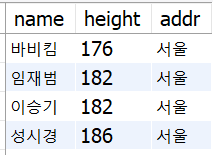

In [18]:
# CASE 표현식의 활용 예
print("""
SELECT name, height, addr
FROM usertbl
ORDER BY CASE addr 	WHEN '서울' THEN 1
			WHEN '경기' THEN 2
                	WHEN '경북' THEN 3
                	WHEN '경남' THEN 4
				    ELSE 10
		END;
""")
Image('case.png')

## Ch.7.2 JOIN 
- 둘 이상의 테이블을 서로 묶어서 하나의 결과 집합으로 만들어 내는 것
- 둘 이상의 재료집합으로 부터 새로운 재료집합을 만드는 연산
- 조인 조건 : WHERE 절 또는 ON 절 / Predicate

- 조인 메커니즘에 따른 종류
    - (내부) 조인 (Inner Join)
    - 외부 조인 (Outer Join)
    - 무조건 조인 (Cross Join) <br>

- 셀프 조인 (Self Join) -> 테이블 별칭이 반드시 필요
- 동등 조인(Equi-Join)

### 1. EXISTS, NOT EXISTS
- 오른편에 반드시 상호관련서브쿼리
- True 나 False 반환
- 다 찾지 않고 진행할 수 있으므로 Performance가 좋음
- 조인 조건을 만족하는 결과가 나오면 
- EXISTS: TRUE를 리턴하고 다음 후보행으로
    - > NOT EXISTS: FALSE를 리턴하고 다음 후보행으로
    - > 서브쿼리의 모든 행에 대해서 조인 조건을 만족하는 행이 하나도 없다면
    - > EXISTS: FALSE를 리턴하고 다음 후보행으로
    - > NOT EXISTS: TRUE를 리턴하고 다음 후보행으로
- EXISTS: Semi-Join
- NOT EXISTS: Anti-Join
